In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('crop_regression.csv')
df.shape

(63505, 8)

In [ ]:
df.head()

,State,District,Crop_Year,Season,Crop,Area,Production,Price_per_KG_INR
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,rice,102,321.0,66
1,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,banana,176,641.0,83
2,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,coconut,18168,65100000.0,125
3,Andaman and Nicobar Islands,Nicobars,2001,Kharif,rice,83,300.0,66
4,Andaman and Nicobar Islands,Nicobars,2001,Whole Year,coconut,18190,64430000.0,125


In [ ]:
df.tail()

,State,District,Crop_Year,Season,Crop,Area,Production,Price_per_KG_INR
63500,West Bengal,Purulia,2014,Rabi,chickpea,198,203.0,100
63501,West Bengal,Purulia,2014,Rabi,mungbean,64,40.0,142
63502,West Bengal,Purulia,2014,Summer,maize,325,2039.0,42
63503,West Bengal,Purulia,2014,Summer,rice,306,801.0,66
63504,West Bengal,Purulia,2014,Winter,rice,279151,597899.0,66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63505 entries, 0 to 63504
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             63505 non-null  object 
 1   District          63505 non-null  object 
 2   Crop_Year         63505 non-null  int64  
 3   Season            63505 non-null  object 
 4   Crop              63505 non-null  object 
 5   Area              63505 non-null  int64  
 6   Production        62616 non-null  float64
 7   Price_per_KG_INR  63505 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.9+ MB


In [ ]:
df['Crop_Year'] = df['Crop_Year'].astype('int32')
df['Area'] = df['Area'].astype('int32')
df['Price_per_KG_INR'] = df['Price_per_KG_INR'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63505 entries, 0 to 63504
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             63505 non-null  object 
 1   District          63505 non-null  object 
 2   Crop_Year         63505 non-null  int32  
 3   Season            63505 non-null  object 
 4   Crop              63505 non-null  object 
 5   Area              63505 non-null  int32  
 6   Production        62616 non-null  float64
 7   Price_per_KG_INR  63505 non-null  int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

State                 0
District              0
Crop_Year             0
Season                0
Crop                  0
Area                  0
Production          889
Price_per_KG_INR      0
dtype: int64

In [ ]:
df['Production']

0             321.0
1             641.0
2        65100000.0
3             300.0
4        64430000.0
            ...    
63500         203.0
63501          40.0
63502        2039.0
63503         801.0
63504      597899.0
Name: Production, Length: 63505, dtype: float64

In [ ]:
df[df['Area'] == 0]

,State,District,Crop_Year,Season,Crop,Area,Production,Price_per_KG_INR
21009,Jharkhand,Dhanbad,2006,Rabi,pigeonpeas,0,1.0,125


Complete Case Analysis

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(62616, 8)

In [ ]:
df.duplicated().sum()

0

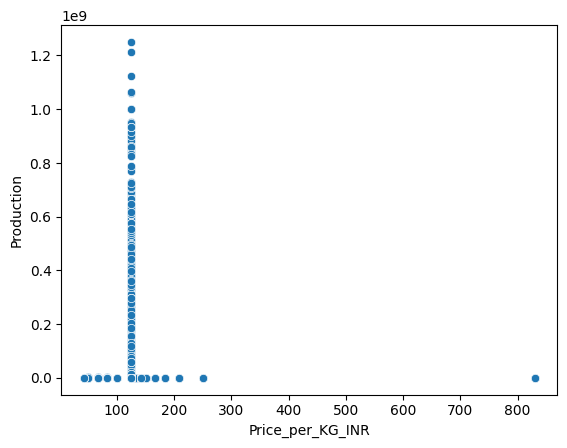

In [ ]:
sns.scatterplot(x=df['Price_per_KG_INR'],y=df['Production'])
plt.show()

In [ ]:
df['State'].value_counts()

State
Uttar Pradesh                  8701
Bihar                          6375
Karnataka                      5013
Assam                          4686
Madhya Pradesh                 4059
Odisha                         3958
Maharashtra                    3470
Tamil Nadu                     3066
West Bengal                    3030
Andhra Pradesh                 2446
Rajasthan                      2306
Gujarat                        2155
Chhattisgarh                   1952
Telangana                      1451
Kerala                         1309
Punjab                         1214
Haryana                        1121
Nagaland                        925
Uttarakhand                     903
Meghalaya                       728
Jharkhand                       608
Arunachal Pradesh               546
Himachal Pradesh                482
Tripura                         452
Jammu and Kashmir               367
Mizoram                         300
Puducherry                      300
Manipur               

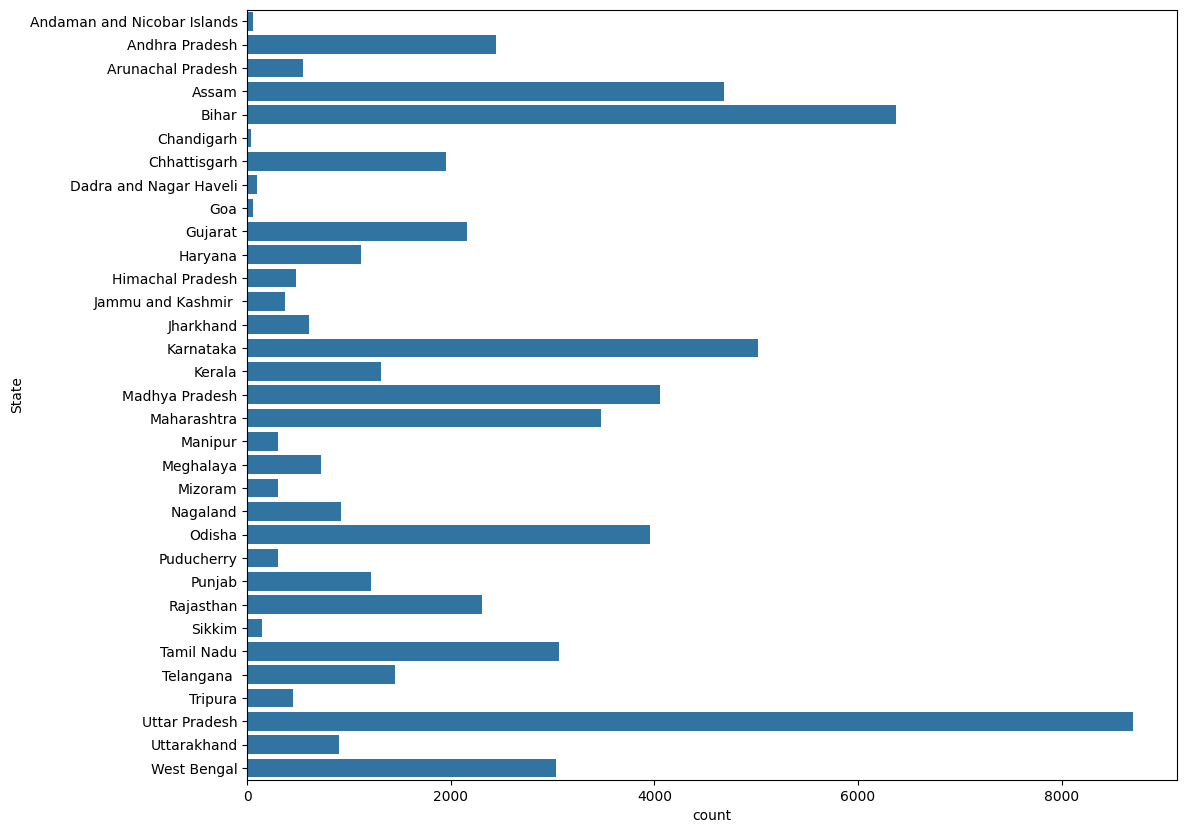

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['State'])
plt.show()

In [ ]:
df['District'].value_counts()

District
Aurangabad    243
Bijapur       215
Hassan        210
Tumkur        208
Mysore        206
             ... 
Shopian         2
Ramgarh         2
Khunti          2
Leh Ladakh      2
Mumbai          1
Name: count, Length: 645, dtype: int64

In [ ]:
df['District'].nunique()

645

In [ ]:
df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int32)

In [ ]:
df['Season'].value_counts()

Season
Kharif         28869
Rabi           12989
Summer          7750
Whole Year      6827
Autumn          3347
Winter          2834
Name: count, dtype: int64

In [ ]:
# imp feature
pd.crosstab(df['Season'],df['Crop'])

Crop,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,maize,mango,mothbeans,mungbean,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,0,6,0,0,0,0,0,0,114,0,...,933,0,0,188,0,0,18,0,2088,0
Kharif,0,131,42,99,13,0,8,12,1290,9,...,7170,55,764,5439,104,147,6701,21,6864,0
Rabi,0,60,57,6945,0,0,0,0,3,9,...,2732,0,1,1907,0,4,444,0,796,0
Summer,0,190,0,0,0,0,0,0,1,0,...,2520,0,0,2059,0,0,28,0,2952,0
Whole Year,4,2739,0,168,1945,6,4,117,0,0,...,237,394,21,181,167,332,254,45,128,85
Winter,0,7,0,15,0,0,0,0,0,0,...,195,0,0,332,0,0,31,0,2254,0


In [ ]:
df['Crop'].value_counts()

Crop
rice           15082
maize          13787
mungbean       10106
pigeonpeas      7476
chickpea        7227
banana          3133
coconut         1958
jute            1408
mothbeans        786
papaya           483
mango            449
orange           271
grapes           129
blackgram         99
watermelon        85
pomegranate       66
lentil            31
kidneybeans       18
cotton            12
coffee             6
apple              4
Name: count, dtype: int64

In [ ]:
df['Production'] = df['Production'].astype('int32')

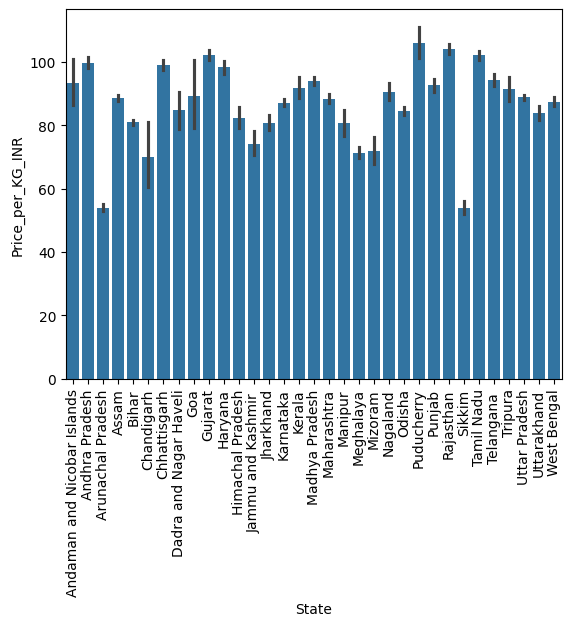

In [ ]:
sns.barplot(x=df['State'],y=df['Price_per_KG_INR'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62616 entries, 0 to 63504
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             62616 non-null  object
 1   District          62616 non-null  object
 2   Crop_Year         62616 non-null  int32 
 3   Season            62616 non-null  object
 4   Crop              62616 non-null  object
 5   Area              62616 non-null  int32 
 6   Production        62616 non-null  int32 
 7   Price_per_KG_INR  62616 non-null  int32 
dtypes: int32(4), object(4)
memory usage: 3.3+ MB


4.329038094720039

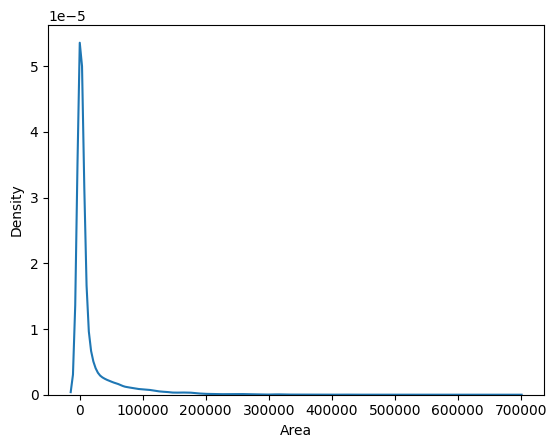

In [ ]:
sns.kdeplot(df['Area'])
df['Area'].skew()

20.67576469743338

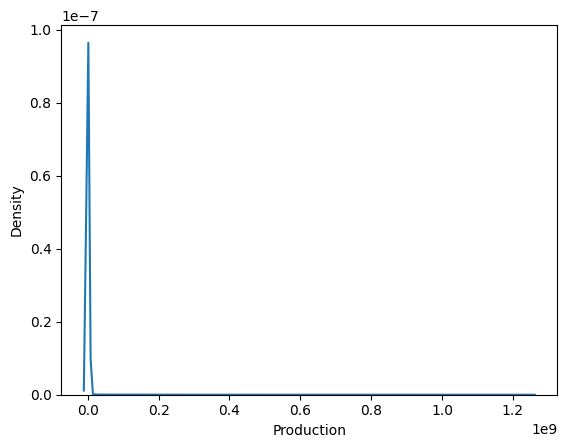

In [ ]:
sns.kdeplot(df['Production'])
df['Production'].skew()

In [ ]:
# from sklearn.preprocessing import FunctionTransformer

# ft = FunctionTransformer(func=np.log1p)

# df['log_area'] = ft.fit_transform(df['Area'])
# df['log_production'] = ft.fit_transform(df['Production'])

In [ ]:
# sns.kdeplot(df['log_area'])

In [ ]:
# sns.kdeplot(np.exp(df['log_production']))

In [ ]:
# df['log_production'].skew()

In [ ]:
df.sample()

,State,District,Crop_Year,Season,Crop,Area,Production,Price_per_KG_INR
31738,Madhya Pradesh,Tikamgarh,2008,Whole Year,banana,2,54,83


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
pipe1 = Pipeline(steps = [('ft',FunctionTransformer(func=np.log1p)),
                          ('ss',StandardScaler())])
pipe2 = Pipeline(steps = [('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'))]) #removed dummy variable trap

In [ ]:
ct = ColumnTransformer(transformers=[
    ('ft',pipe1,['Area','Production']),
    ('ohe',pipe2,['State','District','Season','Crop'])
])

In [ ]:
pipe = Pipeline(steps = [('ct',ct),
                         ('rfr',RandomForestRegressor())])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ft',
                                                  Pipeline(steps=[('ft',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Area', 'Production']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['State', 'District',
                                                   'Season', 'Crop'])])),
                ('rfr', RandomForestRegressor())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9998588709471566

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
df.Production.max()

1250800000